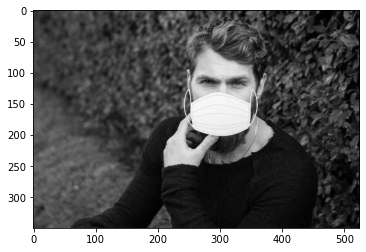

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/ASUS/observations-master/experiements/data"

CATEGORIES = ["with_mask", "without_mask"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array.shape)

(350, 525)


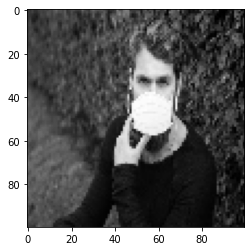

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 686/686 [00:26<00:00, 25.49it/s]

1372


In [7]:
import random

random.shuffle(training_data)


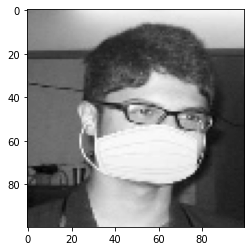

(100, 100)
(100, 100, 1)


In [66]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

  # graph it
plt.imshow(X[1], cmap='gray')
plt.show()
print(X[1].shape)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

print(X[1].shape)


In [9]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0


In [10]:
print(X.shape)

(1372, 100, 100, 1)


In [11]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow



Using TensorFlow backend.


In [12]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [13]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(X,y,test_size=0.1)

In [14]:
model.fit(train_data,train_target, batch_size=32, epochs=20, validation_split=0.2)

Train on 987 samples, validate on 247 samples
Epoch 1/20
987/987 [==============================] - 159s 161ms/step - loss: 0.8661 - accuracy: 0.5856 - val_loss: 0.6848 - val_accuracy: 0.5992
Epoch 2/20
987/987 [==============================] - 116s 117ms/step - loss: 0.5184 - accuracy: 0.7356 - val_loss: 0.4369 - val_accuracy: 0.7814
Epoch 3/20
987/987 [==============================] - 117s 118ms/step - loss: 0.3422 - accuracy: 0.8592 - val_loss: 0.3339 - val_accuracy: 0.8704
Epoch 4/20
987/987 [==============================] - 116s 118ms/step - loss: 0.2131 - accuracy: 0.9200 - val_loss: 0.2642 - val_accuracy: 0.8866
Epoch 5/20
987/987 [==============================] - 126s 127ms/step - loss: 0.1378 - accuracy: 0.9524 - val_loss: 0.2735 - val_accuracy: 0.8866
Epoch 6/20
987/987 [==============================] - 111s 112ms/step - loss: 0.1249 - accuracy: 0.9554 - val_loss: 0.3043 - val_accuracy: 0.8664
Epoch 7/20
987/987 [==============================] - 120s 121ms/step - loss: 

[1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0
 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1]


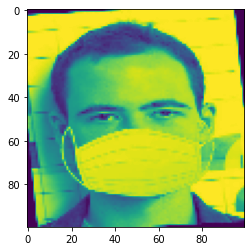

In [71]:

#v = np.reshape(test_data[2],(1,100,100,1))
print(test_target)
v = np.array(test_data).reshape(-1, IMG_SIZE, IMG_SIZE)
plt.imshow(v[4]) 
plt.show()

In [92]:
v = np.reshape(test_data[6],(1,100,100,1))
c = model.predict(v)
if c>=0.5:
    c = 1 
else:
    c = 0

print(c)

[[0.08054346]]


In [47]:
model.save('face_mask_detector.h5')

In [48]:
from keras.models import load_model
import cv2
import numpy as np

In [49]:
model = load_model('face_mask_detector.h5')

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 256)       2560      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 256)       590080    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 135424)           

In [51]:


face_clsfr=cv2.CascadeClassifier('C:/Users/ASUS/observations-master/haarcascade_frontalface_default.xml')



In [102]:
source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}
while(True):

    ret,img=source.read(0)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        if result>=0.5:
            label = 1 
        else:
            label = 0

        print(label)
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

        
cv2.destroyAllWindows()
source.release()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [101]:
q

NameError: name 'q' is not defined